<a href="https://colab.research.google.com/github/vkusnezh/Projects-Portfolio/blob/main/PB_test_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



1.   Зчитування файлу



In [3]:
#завантаженя тестового файлу з даними з Google drive
url='https://drive.google.com/file/d/1wMn3p9znyIz-gmVCHJNfdUnkIzv2j8DA/view?usp=sharing'
url_c='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(url_c, sep='\t', index_col='id') #використовуючи бібліотеку Pandas зчитуємо .csv файл, дослідним шляхом виначивши, що sep='\t'

data.shape #превірка розмірності завантаженого датафрейму


(26824, 553)



2.   Досліджуємо завантажені дані (Exploratory Data Analysis)



In [4]:
data.describe()

,Unnamed: 0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,...,num_389,num_390,num_391,cat_125,num_392,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,gb
count,26824.000000,2.302800e+04,2.295300e+04,63.000000,26816.000000,1.720900e+04,2.682400e+04,26816.000000,26824.000000,26492.000000,16364.000000,21186.000000,36.000000,7816.000000,26816.000000,2.586000e+04,26816.000000,11530.000000,10350.00000,535.000000,2.682400e+04,445.000000,62.000000,1.0,0.0,26824.000000,1.0,26824.000000,26824.000000,799.000000,26816.000000,2.601100e+04,26824.000000,26824.000000,2.681600e+04,26824.000000,26824.000000,26824.000000,2.681600e+04,26824.000000,...,2.495900e+04,1158.000000,1158.000000,26824.000000,0.0,26813.000000,26824.000000,26824.000000,26824.000000,26824.000000,1661.000000,2.681400e+04,20819.000000,11.000000,26824.000000,18329.000000,216.000000,2.486500e+04,161.000000,26824.000000,2.649200e+04,156.000000,2.682400e+04,2.682400e+04,26824.000000,2.338600e+04,26824.000000,26824.000000,26824.000000,2.682400e+04,2.682400e+04,2.682400e+04,26824.000000,26824.000000,2.681600e+04,2.681600e+04,26816.000000,26824.000000,26824.000000,26824.000000
mean,29606.161013,4.969082e+03,6.187651e+03,10681.549206,1333.862619,1.811279e+03,3.542384e+03,44.456183,1.001789,130.260192,27.937470,242.786223,1377.333333,418.161899,291.643086,5.495242e+03,1.310300,265.482385,471.17218,-5846.926168,1.110516e+04,53.946067,32.532258,-8561.0,NaN,1.141403,221.0,1.362996,1.002386,561.941176,41.836627,-5.260944e+03,1.127200,925.885550,3.516451e+06,1.115978,1.000298,1.077393,5.271065e+04,2.035863,...,1.258487e+03,999.429188,33.341969,1.337571,NaN,0.550106,1.025574,1.000298,1.619296,1.001044,-267.546177,3.431250e+04,1481.240818,12890.454545,1.002050,1275.610126,1.648148,4.166503e+03,4452.245342,1.055174,2.007446e+05,7772.487179,1.796096e+04,1.775314e+04,387.615115,3.341067e+03,221.090359,387.615115,252.911456,2.389560e+04,1.110516e+04,5.696115e+03,1.011109,1.164480,5.938060e+06,3.697154e+02,0.070825,3.155942,1.011967,0.022107
std,17746.372502,5.684555e+04,7.633742e+04,38530.374205,753.316053,6.006882e+04,6.379273e+04,25.106561,0.074259,125.132054,412.358469,5503.738652,1501.049861,1906.033793,751.812548,7.265104e+04,2.048061,1601.555012,3877.87801,39684.141192,1.122779e+05,110.235014,36.321297,NaN,NaN,0.349298,NaN,0.481492,0.066844,2793.154282,36.815477,2.112461e+05,0.374005,17187.388064,7.744363e+06,0.352567,0.017267,0.268333,1.756721e+05,0.365000,...,3.835026e+04,552.071018,18.427709,0.473520,NaN,0.950787,0.225045,0.017267,0.509839,0.042290,23627.935069,6.583610e+04,11792.274069,12281.665696,0.051408,12591.995841,2.015359,6.173586e+04,9718.594627,0.252810,2.111213e+05,29177.029430,2.494841e+05,2.481340e+05,3149.091152,5.061099e+04,5351.820522,3149.091152,5364.756451,3.449906e+05,1.122779e+05,6.192586e+04,0.107624,0.370717,1.170207e+07,1.211155e+04,0.134555,1.626000,0.124109,0.147035
min,0.000000,1.000000e-01,1.000000e-01,12.000000,13.000000,1.000000e-01,-2.375040e+05,0.000000,1.000000,2.000000,0.100000,-0.300000,64.000000,-91.100000,0.000000,-7.000000e+00,0.000000,-214.700000,-1517.00000,-559612.000000,1.000000e-01,1.000000,1.000000,-8561.0,NaN,1.000000,221.0,1.000000,1.000000,50.000000,0.000000,-5.593766e+06,1.000000,-744283.960000,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,1.000000,...,-1.464723e+06,32.000000,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,-573804.000000,0.000000e+00,0.100000,1.000000,1.000000,0.100000,1.000000,1.000000e-01,16.500000,1.000000,0.000000e+00,30.000000,0.000000e+00,0.000000e+00,0.000000,-1.00000

In [5]:
data.head(7) #візуальне одзнайомлення з 7ма першими рядками датафрейму

,Unnamed: 0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,...,num_389,num_390,num_391,cat_125,num_392,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,gb
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1377.3,3712.9,NaN,1303.0,2409.0,1281.7,43.0,1,195.0,NaN,27.4,NaN,417.1,2210.0,12970.8,0.0,343.3,0.6,NaN,11327.5,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,60.0,-10446.6,1,559.6,18598389.68,1,1,1,74742.52,1,...,2784.3,NaN,NaN,1,NaN,0.0,1,1,1,1,NaN,4743.92,3758.2,NaN,1,9.4,NaN,7029.0,NaN,1,500000.0,NaN,11728.9,11728.3,1014.2,3454.0,0.0,1014.2,0.0,46913.2,11327.5,11327.5,1,1,28162496.65,0.0,0.07,1,1,0
2,1,20.0,13.4,NaN,565.0,NaN,357.2,19.0,1,170.0,NaN,NaN,NaN,NaN,68.0,123.6,2.0,NaN,NaN,NaN,168.6,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,12.0,-986.3,1,25.0,963054.61,1,1,1,0.00,2,...,143.4,NaN,NaN,1,NaN,2.0,1,1,1,1,NaN,6419.05,148.2,NaN,1,NaN,NaN,NaN,NaN,1,35000.0,NaN,1343.5,1343.5,0.0,NaN,0.0,0.0,0.0,1343.5,168.6,168.6,1,1,989383.82,0.0,0.56,2,1,0
3,4,150.6,1.8,NaN,2294.0,15.0,107.6,76.0,1,196.0,2.3,5.3,NaN,14.5,33.0,71.6,1.0,NaN,NaN,NaN,209.1,NaN,NaN,NaN,NaN,2,NaN,2,1,50.0,15.0,-161.3,1,99.8,71843.00,1,1,1,0.00,2,...,2.6,NaN,NaN,1,NaN,0.0,1,1,1,1,NaN,74.09,NaN,NaN,1,72.1,NaN,98.0,NaN,1,15000.0,NaN,268.9,268.9,13.5,10.2,79.6,13.5,79.6,268.9,209.1,209.1,1,1,87444.51,0.0,0.01,3,1,0
4,5,11.4,178.0,NaN,1236.0,NaN,350.6,41.0,1,117.0,5.3,25.2,NaN,NaN,39.0,57.6,2.0,NaN,1.3,NaN,56.9,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,41.0,-755.9,1,143.1,237787.00,1,1,1,12078.50,2,...,-171.9,NaN,NaN,1,NaN,0.0,1,1,1,1,NaN,5859.27,19.0,NaN,1,39.2,NaN,228.5,NaN,1,20000.0,NaN,1107.8,1106.5,0.0,24.9,0.0,0.0,0.0,1106.5,56.9,56.9,1,1,297608.00,0.0,0.08,4,1,0
5,6,5372.0,3386.0,NaN,1340.0,NaN,14.0,45.0,1,9.0,108.0,716.0,NaN,NaN,401.0,2447.0,0.0,1282.0,87.0,NaN,60925.0,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,64.0,1335.0,1,28.0,1665741.11,1,1,1,128520.23,2,...,196.0,NaN,NaN,2,NaN,5.0,1,1,1,1,6.0,3161.35,331.0,NaN,1,NaN,NaN,2649.0,NaN,2,190000.0,NaN,1436.0,1349.0,31.0,435.0,0.0,31.0,0.0,5396.0,60925.0,31.0,1,1,6614247.89,0.0,0.20,1,1,0
6,7,286.6,611.2,NaN,1289.0,NaN,558.2,43.0,1,195.0,4.0,21.9,NaN,NaN,1397.0,3230.1,1.0,45.0,NaN,NaN,3956.3,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,87.0,-1896.1,1,611.6,3137749.03,2,1,1,132596.65,2,...,3071.8,NaN,NaN,1,NaN,1.0,1,1,1,1,NaN,21.03,176.5,NaN,1,NaN,NaN,433.1,NaN,2,490000.0,NaN,2457.3,2454.3,0.0,3004.9,-3.0,0.0,0.0,9817.2,3956.3,3956.3,1,1,6952338.21,0.0,0.01,1,2,0
7,8,NaN,NaN,NaN,1534.0,81.2,178.7,51.0,1,190.0,NaN,14.1,NaN,NaN,165.0,81.5,1.0,0.2,NaN,NaN,120.3,NaN,NaN,NaN,NaN,1,NaN,2,1,NaN,12.0,-760.4,1,178.7,519045.75,1,1,1,6741.73,2,...,-34.9,NaN,NaN,2,NaN,0.0,1,1,2,1,NaN,1286.67,NaN,NaN,1,67.6,NaN,107.0,NaN,1,55000.0,NaN,939.1,939.1,0.0,0.8,136.4,0.0,136.4,939.1,120.3,120.3,1,1,657902.26,0.0,0.06,4,1,0


In [6]:
data.isna().sum() #визначаємо к-сті відсутніх значень у стовпцях датафрейму

Unnamed: 0        0
num_1          3796
num_2          3871
num_3         26761
num_4             8
              ...  
num_415           8
num_416           8
cat_134           0
cat_135           0
gb                0
Length: 553, dtype: int64

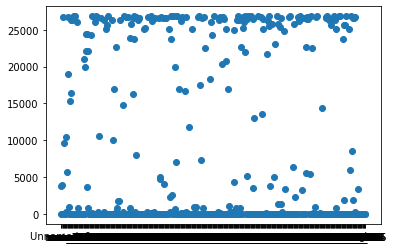

In [7]:
plt.scatter(x=data.columns, y=data.isna().sum()) # візуальне представлення суми NaN по стовпцях

Наш датасет складається з стовпців числових і категоріальних змінних. Причоому у стовпцях числових змінних є відсутніми багато значень. Як видно з поперднього запиту, у стовпці таргета - gb немає NaN значень, тому рядків видаляти не потрібно.

Подальші дії. Вибираємо спосіб заміни NaN значень:

*   відсутні значення - замінимо на 0
*   відсутні значення - замінюємо на середнє значення по стовцю за доп. SimpleImputer

Для перевірки ефективності вибраного способу видалимо категоріальні змінні, на даному етапі, та за допомогою простої моделі KNeighborsClassifier порівняємо точності для цих двох підходів.

Щодо катгоріальних зміних, то існує три підходи як з ними працювати:

1) виключити їх з аналізу

2) використати Ordinal Encoding, приписує унікальне значення кожному integer

3) використати One-Hot Encoding, створюється новий стовпець - в якому вказується прустність (відсутність) кожного можливого значення у вихідному стовпці. Це призводить до збільшення к-сті стовців у робочому датафреймі(якщо категоріальна змінна має 6 категорій, тоді отримаємо 6 додаткових стовпців).







In [8]:
data_m=data.fillna(0) #замінюємо значення NaN на 0

In [9]:
cols_with_missing = [col for col in data_m.columns if data_m[col].abs().sum()==0] #шукаємо імена стовпців у яких всі значення рівні 0
#print(cols_with_missing) 

#їх виявилось 12: ['num_23', 'num_66', 'num_150', 'num_152', 'num_242', 'num_250', 'num_258', 'num_266', 'num_342', 'num_365', 'num_375', 'num_392']

data_m.drop(cols_with_missing, axis=1, inplace=True) #вилучаємо пусті стовпці з датафрейму
data_m.describe()

,Unnamed: 0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,cat_10,...,num_388,num_389,num_390,num_391,cat_125,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,gb
count,26824.000000,2.682400e+04,2.682400e+04,26824.000000,26824.000000,2.682400e+04,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,...,2.682400e+04,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,2.682400e+04,26824.000000,2.682400e+04,2.682400e+04,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,2.682400e+04,2.682400e+04,2.682400e+04,26824.000000,26824.000000,2.682400e+04,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000
mean,29606.161013,4.265882e+03,5.294704e+03,25.087146,1333.464808,1.162030e+03,3.542384e+03,44.442924,1.001789,128.647965,17.043273,191.756223,1.848494,121.844371,291.556106,5.297754e+03,1.309909,114.114670,181.801076,-116.615922,1.110516e+04,0.894945,0.075194,-0.319154,1.141403,0.008239,1.362996,1.002386,16.738406,41.824150,-5.101491e+03,1.127200,925.885550,3.515402e+06,1.115978,1.000298,1.077393,5.269493e+04,2.035863,1.001007,...,5.441312e+02,1.170988e+03,43.145653,1.439383,1.337571,0.549881,1.025574,1.000298,1.619296,1.001044,-16.567037,3.429970e+04,1149.640344,5.286124,1.002050,871.632046,0.013272,3.862217e+03,26.722767,1.055174,1.982600e+05,45.202356,1.796096e+04,1.775314e+04,387.615115,2.912846e+03,221.090359,387.615115,252.911456,2.389560e+04,1.110516e+04,5.696115e+03,1.011109,1.164480,5.936289e+06,3.696051e+02,0.070804,3.155942,1.011967,0.022107
std,17746.372502,5.269825e+04,7.064800e+04,1923.253451,753.555777,4.812064e+04,6.379273e+04,25.114551,0.074259,125.186429,322.359935,4892.233350,74.045219,1046.224823,751.717294,7.134091e+04,2.047881,1058.181008,2419.634538,5658.662398,1.122779e+05,15.767915,2.332558,52.271231,0.349298,1.349368,0.481492,0.066844,491.153381,36.817075,2.080220e+05,0.374005,17187.388064,7.743446e+06,0.352567,0.017267,0.268333,1.756482e+05,0.365000,0.040026,...,3.418578e+04,3.699438e+04,233.254561,7.782636,0.473520,0.950657,0.225045,0.017267,0.509839,0.042290,5878.307085,6.582716e+04,10407.084601,352.633246,0.051408,10425.648118,0.232926,5.944859e+04,825.633183,0.252810,2.109814e+05,2295.351956,2.494841e+05,2.481340e+05,3149.091152,4.726951e+04,5351.820522,3149.091152,5364.756451,3.449906e+05,1.122779e+05,6.192586e+04,0.107624,0.370717,1.170077e+07,1.210975e+04,0.134541,1.626000,0.124109,0.147035
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-2.375040e+05,0.000000,1.000000,0.000000,0.000000,-0.300000,0.000000,-91.100000,0.000000,-7.000000e+00,0.000000,-214.700000,-1517.000000,-559612.000000,1.000000e-01,0.000000,0.000000,-8561.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-5.593766e+06,1.000000,-744283.960000,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,...,0.000000e+00,-1.464723e+06,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-573804.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00

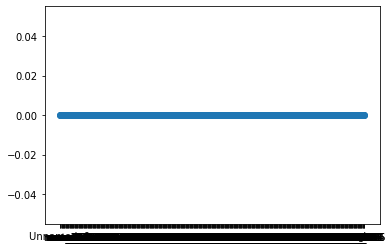

In [10]:
plt.scatter(x=data_m.columns, y=data_m.isna().sum()) # візуальне представлення суми NaN по стовцях після їх заміни на 0, для перевірки

In [11]:
#Відділяємо target від предикторів
y = data_m.gb
X = data_m.drop(['Unnamed: 0','gb'], axis=1)
X.shape

# розділяємо датасет на training і validation датасети
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

Вилучаємо категоріальні змінні

In [12]:
print(X_train.dtypes) #перевірями тип категоріальних змінних 

num_1      float64
num_2      float64
num_3      float64
num_4      float64
num_5      float64
            ...   
num_414    float64
num_415    float64
num_416    float64
cat_134      int64
cat_135      int64
Length: 539, dtype: object


In [13]:
# Складаємо список категоріальних змінних
s = (X_train.dtypes == 'int64')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'cat_24', 'cat_25', 'cat_26', 'cat_27', 'cat_28', 'cat_29', 'cat_30', 'cat_31', 'cat_32', 'cat_33', 'cat_34', 'cat_35', 'cat_36', 'cat_37', 'cat_38', 'cat_39', 'cat_40', 'cat_41', 'cat_42', 'cat_43', 'cat_44', 'cat_45', 'cat_46', 'cat_47', 'cat_48', 'cat_49', 'cat_50', 'cat_51', 'cat_52', 'cat_53', 'cat_54', 'cat_55', 'cat_56', 'cat_57', 'cat_58', 'cat_59', 'cat_60', 'cat_61', 'cat_62', 'cat_63', 'cat_64', 'cat_65', 'cat_66', 'cat_67', 'cat_68', 'cat_69', 'cat_70', 'cat_71', 'cat_72', 'cat_73', 'cat_74', 'cat_75', 'cat_76', 'cat_77', 'cat_78', 'cat_79', 'cat_80', 'cat_81', 'cat_82', 'cat_83', 'cat_84', 'cat_85', 'cat_86', 'cat_87', 'cat_88', 'cat_89', 'cat_90', 'cat_91', 'cat_92', 'cat_93', 'cat_94', 'cat_95', 'cat_96', 'cat_97', 'cat_98', 'cat_

In [15]:
drop_X_train = X_train.select_dtypes(exclude=['int64']) # вилучаємо ствовпці з типом змінних int64, у них записані категоріальні змінні, із робочих датафреймів  train і valid
drop_X_valid = X_valid.select_dtypes(exclude=['int64'])

In [16]:
drop_X_train.head() # перевіряємо результат видалення категоріальних змінних

,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_24,num_25,num_26,num_27,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,...,num_376,num_377,num_378,num_379,num_380,num_381,num_382,num_383,num_384,num_385,num_386,num_387,num_388,num_389,num_390,num_391,num_393,num_394,num_395,num_396,num_397,num_398,num_399,num_400,num_401,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,num_414,num_415,num_416
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1677,6.0,0.8,0.0,860.0,571.2,698.2,29.0,111.0,0.0,0.0,0.0,0.0,29.0,293.8,2.0,0.0,5.0,0.0,1660.0,0.0,0.0,0.0,0.0,0.0,29.0,-2865.2,101.800,8751.86,0.00,0.0,29858.77,71.800,0.0,0.0,0.0,0.0,-601.4,0.0,19.0,82914.14,...,0.0,0.0,71.8,1660.0,3563.400,71.800,566.9,0.0,363978.0,603710.0,0.0,15.0,0.0,74.8,0.0,0.0,0.0,0.0,65744.64,0.0,0.0,1.0,0.0,124.8,0.0,200000.0,0.0,3568.4,3563.4,0.0,269.2,30.0,0.0,30.0,3563.400,1660.0,1660.0,777898.00,0.00,0.03
5040,134.2,12.2,0.0,101.0,5060.7,7922.9,3.0,107.0,0.0,2173.0,0.0,0.0,169.0,0.0,1.0,0.0,0.0,0.0,10673.5,0.0,0.0,0.0,0.0,0.0,40.0,-12119.0,10235.414,12601006.56,0.00,0.7,842284.95,10236.212,0.0,0.0,0.0,0.0,-227.1,0.0,3.0,183262.86,...,0.0,0.0,7696.4,10673.5,26655.727,10236.345,3143.4,0.0,1813685.0,3846844.5,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,179748.12,3154.6,0.0,0.0,0.0,0.0,0.0,200000.0,0.0,20042.6,20041.9,0.0,0.0,-0.7,0.0,0.0,26655.727,10673.5,10673.5,29237130.66,0.00,0.02
1217,38.3,51.2,0.0,1086.0,0.0,392.5,36.0,6.0,1.9,13.5,0.0,69.2,58.0,471.3,1.0,0.0,0.0,0.0,850.1,0.0,0.0,0.0,0.0,0.0,50.0,-1656.4,21.800,646575.69,0.00,0.0,599887.10,20.200,0.0,0.0,0.0,0.0,-370.7,0.0,16.0,194354.45,...,0.0,0.0,20.2,850.1,2048.900,20.200,650.3,0.0,49421.0,296307.0,0.0,6.0,0.0,16.9,0.0,0.0,0.0,0.0,13175.31,43.3,0.0,304.9,0.0,508.0,0.0,180000.0,0.0,2048.9,2048.9,73.4,460.0,1.6,73.4,1.6,2048.900,850.1,850.1,1133025.69,0.00,0.00
927,3953.3,1367.6,0.0,581.0,1826.2,1825.1,19.0,229.0,14.8,50.7,0.0,0.0,53.0,5037.7,1.0,710.1,428.2,0.0,12319.6,0.0,0.0,0.0,0.0,0.0,130.0,-6346.8,800.000,4856118.21,45611.69,0.0,4126803.61,592.400,0.0,0.0,0.0,0.0,-1853.3,0.0,8.0,489166.45,...,0.0,0.0,296.2,12319.6,16343.800,592.400,5382.8,0.0,583197.0,3053699.5,0.0,8.0,0.0,2611.0,0.0,0.0,0.0,0.0,2640.89,237.4,0.0,3779.2,0.0,5748.5,0.0,330000.0,0.0,8600.1,8171.9,1135.8,1417.2,103.8,1135.8,103.8,16343.800,12319.6,12319.6,5876746.46,1195.42,0.00
2182,242.1,17.2,0.0,1344.0,8.0,87.3,45.0,71.0,1.6,3.2,0.0,0.0,25.0,280.9,2.0,1.4,0.0,0.0,513.4,0.0,0.0,0.0,0.0,0.0,16.0,-2413.2,80.700,377026.18,17085.21,0.0,54884.29,75.600,0.0,0.0,0.0,0.0,-6.6,0.0,29.0,61293.39,...,0.0,0.0,75.6,513.4,2500.500,75.600,210.5,0.0,2701.0,99024.5,0.0,10.0,0.0,85.6,0.0,0.0,0.0,0.0,5140.84,50.6,0.0,20.3,0.0,294.9,0.0,70000.0,0.0,2500.5,2500.5,186.4,87.6,5.1,186.4,5.1,2500.500,513.4,513.4,433442.18,0.00,0.02


Для оцінки підходів до NaN начень використаємо K-Nearest Neighbors Algorithm

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(drop_X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(drop_X_valid)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[5225   29]
 [  62   49]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5254
           1       0.63      0.44      0.52       111

    accuracy                           0.98      5365
   macro avg       0.81      0.72      0.75      5365
weighted avg       0.98      0.98      0.98      5365

